# Chai Time Data Science
Chai Time Data Science show are series of podcasts hosted by Sanyam Bhutani, where he interviews Kagglers, Researchers and Data science practitioners.<br> This Contest has been organized marking 1st year anniversary of CTDS.show podcasts. <br>

<b>Podcast related stats and content (subtitles) are provided by the organizers. The goal of this contest is to use these datasets and come up with interesting insights or stories that could eventually help CTDS.show. </b><br>

<b>Judging criteria for the contest - 5 categories: Presentation, Story telling, Visualizations, Insights and Innovation. </b> <br>
    
Let us dive in, explore the data, find insights and see whether we could pen a beautiful story out of 1 marvelous sustained perennial year of 85 episodes. Podcasts are available through Youtube, Spotify, Apple and all other Major podcast platforms.<br>
Along the way we could get to know ML heroes better and learn from them through this contest.



# 1. Importing Packages
**Importing all the necessary packages as the first step**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as plty
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.io as pio
import spacy
import os
from IPython.display import display
%matplotlib inline

# 2. Loading Datasets & Taking a Peek
Loading the supplied datasets (description below) in and skimming through. Later we shall explore the need for any external datasets
* Episodes: Has the stats of all episodes of Chai Time Data Science show
* Youtube Thumbnail Types: Metadata of youtube thumbnail types used in CTDS show
* Anchor Thumbnail Types: Metadata of anchor thumbnail types used in CTDS show
* Description: Description of each episode
* Cleaned Subtitles: Subtitles of each episode (cleaned version)

In [2]:
path = '../input/chai-time-data-science/'

In [3]:
df_episodes = pd.read_csv(f'{path}Episodes.csv',parse_dates=['recording_date','release_date'])
df_yt = pd.read_csv(f'{path}YouTube Thumbnail Types.csv')
df_anchortn = pd.read_csv(f'{path}Anchor Thumbnail Types.csv')
df_desc = pd.read_csv(f'{path}Description.csv')

<h3>Lets take a look at the datasets. Primary gathering info on # of records, missing values and get a feel about the different datasets.</h3>

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', False)

# 3. Beginning the Data exploration

# **Questions that ponder**
* What brings the audience?
    * Heroes?
    * Content/format?
    * Subscribers?
    * Seasonality?
    * Interesting questions?
    * Duration of podcasts?
    * Aesthetics like thumbnails?
* Do viewers sustain over period?
* Chai's role in Chai Time Data Science.show
* How does podcasts being received across multiple mediums? <br>

<H3>Lets discover the ingredients that works best for chai time data science show...</H3>

<b>Based on skimming through the available data, we could spot 2 categories for our analysis: Content Related (actual content - subtitles data) & Non-Content Related (everything else..) </b><br>

Lets begin the exploration with Non-Content related data..

# 4 Non-Content Related
   # 4.1 **Episodes & Show**

In [5]:
print('\033[33m' + 'Episodes Dataset - Exploration stats' + '\033[0m')
df_episodes.describe(include='all').T

Episodes Dataset - Exploration stats


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
episode_id,85,85,E33,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episode_name,85,85,Interview with Marios Michailidis | What does ...,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroes,74,72,Robert Bracco,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroes_gender,74,2,Male,65,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroes_location,74,19,USA,37,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroes_nationality,74,21,USA,22,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroes_kaggle_username,46,44,madeupmasters,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroes_twitter_handle,66,65,shivamshaz,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85,4,Industry,34,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flavour_of_tea,85,9,Masala Chai,16,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Factor</b>', '<b>Total</b>', '<b>Average</b>'], line_color='darkgray',fill_color='darkorange',font=dict(color='white', size=16)),
                 cells=dict(values=[['Episodes', 'Duration (min)', 'Youtube views', 'Youtube avg watch duration (min)', 'Youtube subscribers','Spotify streams', 'Spotify listeners', 'Apple listeners','Apple avg listen duration (min)'], 
                                    ['85 with 72 unique heroes', 271991, 43616, 450, 1027, 6720,5455,1714,2434], 
                                    ['7 per month', 3200, 513, 5.3, 12, 80, 65, 21, 29.33]], line_color='darkgray',fill_color='white',font=dict(color='black', size=12), height=25))])

fig.update_layout(height=450, width=870)

fig.show()

# What could we find from Episodes
**Evaluating through youtube, spotify and apple prime stats.**

* Highlight of this entire podcast series is attracted audience across multiple platforms, consistency in producing podcasts perenially with ML heroes is not easy by any means.
* CTDS have given us closer to 2 podcasts per week (1.77 to be exact) in last 1 year, which is monumental.
* Podcasts have reached over 55k viewers across platforms.
* Youtube is the most preferred and tops the list interms of viewership. Spotify and Apple platforms didn't garner enough viewership with 5455 and 1714 unique listeners respectively. 
* Though apple/spotify podcasts didn't have enough views, they gave CTDS a good audience who watched podcasts for significant duration. <u>While Youtube average watch duration is just 5.3 minutes, apple avg listen duration had a whopping 29.33 minutes. Looks like lesser distractions (or format of the show) for podcasts sets the stage for better audience</u>, but youtube having a mass following garnered more views. 
* Should CTDS concentrate more on reaching podcasts-audio audience where engagement is good or to have a different format for youtube to capitalize viewership and actually being viewed. Why didn't youtube viewers get glued to the videos until the end? Is it due to the format, presentation etc? Lets explore further <br>
* Initial take looks like - the format of the episodes since being interview series was best suited for audio only podcasts based on average listen duration of podcasts by the audience

<h3>We shall start with exploration of episodes on youtube statistics as this medium has significant contribution with views and reaching more audience</h3>

In [7]:
fig = px.scatter(df_episodes, x='episode_id', y='youtube_subscribers', height=400, title='<b>Episodes Vs New Youtube Subscribers</b>', color='youtube_subscribers',
             color_continuous_scale='Viridis')
mean_s = df_episodes['youtube_subscribers'].mean()
fig.add_shape(type="line", x0='E0', x1='E75', y0=mean_s, y1=mean_s, line=dict(color='darkblue', width=2, dash='dot'),)
fig.add_trace(go.Scatter(x=['E64'], y=[40], text=["--- Mean Subscribers"], mode="text"))
fig.update_layout(plot_bgcolor='rgb(255,255,255)', showlegend=False)
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title='Youtube subscribers')
fig.data[0].update(mode='markers+lines')
fig.show()

    * # of subscribers are an important factor as viewers will become a subscriber once they like podcasts, want to keep track of the channel and listen to upcoming episodes
    * youtube subscribers count wasn't iteratively increasing with episodes being released.
    * There are 3 high points/peaks - E1, E27 and E49
    * There are 2 significant concerning flat range below mean line (avg subscribers per episode: 12.08), one between E2 and E16 and other between M0 to M8
    Lets explore further to identify what could be the reasons for the same

In [8]:
df_episodes['yt_subs_cumulative'] = df_episodes['youtube_subscribers'].cumsum()
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,vertical_spacing=0.03, subplot_titles=("<b>Youtube Views</b>", "<b>Youtube Subscribers</b>", "<b>Youtube Subscribers cumulative sum<b>", "<b>Episode Duration (s)</b>"))

fig.append_trace(go.Scatter(name='youtube views', x=df_episodes.episode_id, y=df_episodes.youtube_views), row=1, col=1),
fig.append_trace(go.Scatter(name='youtube new subscribers', x=df_episodes.episode_id, y=df_episodes.youtube_subscribers), row=2, col=1),
fig.append_trace(go.Scatter(name='youtube subscribers cumulative sum', x=df_episodes.episode_id, y=df_episodes.yt_subs_cumulative), row=3, col=1)
fig.append_trace(go.Scatter(name='episode duration', x=df_episodes.episode_id, y=df_episodes.episode_duration), row=4, col=1)

fig.update_layout(height=1000, width=800, legend_orientation="h", plot_bgcolor='rgb(10,10,10)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

# <u>**Episodes vs youtube subscribers & views**</u>
* Episodes that had most view rate brought in more subscribers for CTDS show. 3 major peaks (heroes below) were observed - after E1, E27 and E49 and 2 minor peaks after E42 and E43
    * <b>Jeremy Howard, Parul Pandey, Abhishek Thakur brought in 139, 66, 60 youtube subscribers respectively. Those videos had more than 1500 views. Expectations Vs Reality justified :)</b><br>
* Episode E25 to E45 seems to be golder with better viewership and subscribers peak.
* Episode E2 to E16 & M0 to M8 seems to be dull phase, with almost flat stats on viewership as well as subscribers.
* Top 5 viewed episodes got more subscribers in almost same relative order of magnitude.
* Subscribers very marginally increased as we progress over time and there hasn't been any significant downward trend except during fast.ai miniseries and E2 to E16 during early phase of the podcast series, which remained well below the average. 
* Did subcribers brought in more views for episodes that followed those peaks? Seems to be NO based on the trend.

# 4.2 Release trend and its Impact

In [9]:
df_episodes['release_dofweek'] = df_episodes['release_date'].dt.dayofweek
dic = {'youtube_subscribers': ['sum'], 'episode_id': ['count'],'youtube_views': ['sum']}

df_t = df_episodes.groupby(['release_dofweek']).agg(dic).reset_index()
df_t.columns = ['_'.join(col) for col in df_t.columns.values]

df_t.loc[df_t['release_dofweek_'] == 0,'release_dofweek_'] = 'Monday', 
df_t.loc[df_t['release_dofweek_'] == 1,'release_dofweek_'] = 'Tuesday'
df_t.loc[df_t['release_dofweek_'] == 2,'release_dofweek_'] = 'Wednesday'
df_t.loc[df_t['release_dofweek_'] == 3,'release_dofweek_'] = 'Thursday'
df_t.loc[df_t['release_dofweek_'] == 4,'release_dofweek_'] = 'Friday'
df_t.loc[df_t['release_dofweek_'] == 5,'release_dofweek_'] = 'Saturday'
df_t.loc[df_t['release_dofweek_'] == 6,'release_dofweek_'] = 'Sunday'

In [10]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Episode Count", "Youtube subscribers", "Youtube views"))

colors = ['skyblue'] * 7
colors[3] = 'burlywood'
colors[6] = 'coral'

fig.append_trace(go.Bar(name='Episode Count', x=df_t.release_dofweek_, y=df_t.episode_id_count, showlegend=False, marker_color=colors), row=1, col=1),
fig.append_trace(go.Bar(name='Youtube subscribers', x=df_t.release_dofweek_, y=df_t.youtube_subscribers_sum, showlegend=False, marker_color=colors), row=1, col=2),
fig.append_trace(go.Bar(name='Youtube views', x=df_t.release_dofweek_, y=df_t.youtube_views_sum, showlegend=False, marker_color=colors), row=1, col=3),

fig.update_layout(barmode='stack', height=400, plot_bgcolor='rgb(255,255,255)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

<h3>Did weekend witnessed more views and subscribers on youtube? </h3>
Trend is not evident as most views and subscribers rise happened on Sunday (466 subscribers & ~18k views) and Thurday(337 subscribers & ~16.3k views), mostly due to increased # of episodes published during those days. Lets see other factors..

In [11]:

df_episodes['release_month'] = df_episodes['release_date'].dt.month

temp = df_episodes.drop(df_episodes[df_episodes['episode_id'] == 'E27'].index)
dfr = temp.groupby(['release_dofweek', 'release_month'])['youtube_views'].mean().reset_index()

dfr.loc[dfr['release_dofweek'] == 0,'release_dofweek'] = 'Monday', 
dfr.loc[dfr['release_dofweek'] == 1,'release_dofweek'] = 'Tuesday'
dfr.loc[dfr['release_dofweek'] == 2,'release_dofweek'] = 'Wednesday'
dfr.loc[dfr['release_dofweek'] == 3,'release_dofweek'] = 'Thursday'
dfr.loc[dfr['release_dofweek'] == 4,'release_dofweek'] = 'Friday'
dfr.loc[dfr['release_dofweek'] == 5,'release_dofweek'] = 'Saturday'
dfr.loc[dfr['release_dofweek'] == 6,'release_dofweek'] = 'Sunday'

fig = go.Figure(data=go.Heatmap(x = dfr.release_dofweek, y=dfr.release_month,z=dfr.youtube_views, colorbar = dict(title='youtube_views'), 
                                hovertemplate='Day of week: %{x}<br>Release Month: %{y}<br>Youtube views: %{z:.0f}<br><extra></extra>',
                                hoverongaps=False, colorscale='cividis'))
fig.update_layout(title_text="<b>Release Day and Month effect on youtube views<b>")
fig.update_xaxes(showgrid=False, zeroline=False, title='<b>Release Day</b>')
fig.update_yaxes(showgrid=False, zeroline=False, title='<b>Episode Release Month</b>')
fig.show()

* Most videos are released on 3rd (Thursday) and 6th day (Sunday) of the week. <br>
* <b>Interms of Quarter - Q4 (calendar year) got good average youtube views. Probably vacation period has helped better garnering audience to the show </b><br>
* <b>By Month - Nov, Dec and Jan seem to have worked well gaining audience</b><br>

*Removed E27 in the graph above (outlier) for better interpretability of other episodes by time period*

# 4.3 **Heroes**

# 4.3.1 Heroes & Gender

In [12]:
print('\033[33m' + 'Episodes that had missing values in heroes column' + '\033[0m')
df_episodes[df_episodes['heroes'].isnull()]

Episodes that had missing values in heroes column


,episode_id,episode_name,heroes,heroes_gender,heroes_location,heroes_nationality,heroes_kaggle_username,heroes_twitter_handle,category,flavour_of_tea,recording_date,recording_time,release_date,episode_duration,youtube_url,youtube_thumbnail_type,youtube_impressions,youtube_impression_views,youtube_ctr,youtube_nonimpression_views,youtube_views,youtube_watch_hours,youtube_avg_watch_duration,youtube_likes,youtube_dislikes,youtube_comments,youtube_subscribers,anchor_url,anchor_thumbnail_type,anchor_plays,spotify_starts,spotify_streams,spotify_listeners,apple_listeners,apple_listened_hours,apple_avg_listen_duration,yt_subs_cumulative,release_dofweek,release_month
0,E0,Chai Time Data Science Launch Announcement,NaN,NaN,NaN,NaN,NaN,NaN,Other,Masala Chai,2019-07-15,Evening,2019-07-21,157,https://www.youtube.com/watch?v=Ko_gxs42lM8,1,4433,86,1.94,45,131,3,82,4,0,2,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,553.0,491.0,262.0,359.0,29.0,1.0,117.0,3,6,7
46,M0,00 Introduction & About: fast.ai 2019 & Things...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,624,https://www.youtube.com/watch?v=rzuIkj8lymc,2,3789,139,3.67,162,301,15,179,15,0,2,10,https://anchor.fm/chaitimedatascience/episodes...,2.0,308.0,49.0,33.0,35.0,6.0,1.0,463.0,714,5,3
47,M1,01: Lesson-1 Image Classification | fast.ai 20...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,341,https://www.youtube.com/watch?v=RKtfgXz7Qo0,2,4643,163,3.51,56,219,7,115,8,0,2,1,https://anchor.fm/chaitimedatascience/episodes...,2.0,368.0,37.0,32.0,29.0,10.0,1.0,504.0,715,5,3
48,M2,02: Lesson-2 Production & SGD From Scratch | f...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,316,https://www.youtube.com/watch?v=ahdybq2V-38,2,3144,63,2.00,37,100,3,108,2,1,0,0,https://anchor.fm/chaitimedatascience/episodes...,2.0,317.0,33.0,21.0,24.0,8.0,1.0,312.0,715,5,3
49,M3,03: Lesson-3 Multi-label; SGD from scratch | f...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,332,https://www.youtube.com/watch?v=Z-waVKLcLJE,2,2436,52,2.13,28,80,3,135,2,0,0,0,https://anchor.fm/chaitimedatascience/episodes...,2.0,276.0,20.0,13.0,16.0,11.0,1.0,260.0,715,5,3
50,M4,04: Lesson-4 NLP:Tabular Data; Recsys | fast.a...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,281,https://www.youtube.com/watch?v=5CW3QdGdr8c,2,2592,40,1.54,23,63,2,114,3,0,0,1,https://anchor.fm/chaitimedatascience/episodes...,2.0,301.0,24.0,17.0,17.0,10.0,7.0,2547.0,716,5,3
51,M5,05: Lesson 5: Backprop; Neural Nets from scrat...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,311,https://www.youtube.com/watch?v=RIGlXwvUo_Q,2,2536,26,1.03,11,37,1,97,0,0,0,0,https://anchor.fm/chaitimedatascience/episodes...,2.0,279.0,18.0,16.0,15.0,15.0,2.0,479.0,716,5,3
52,M6,06: Lesson-6 CNN Deep Dive; Ethics | fast.ai 2...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,412,https://www.youtube.com/watch?v=nAE8tq_SIXo,2,3572,49,1.37,33,82,2,88,2,0,0,0,https://anchor.fm/chaitimedatascience/episodes...,2.0,275.0,27.0,13.0,17.0,11.0,2.0,515.0,716,5,3
53,M7,07: Lesson-7 ResNet; U-Net; GANs | fast.ai 201...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,467,https://www.youtube.com/watch?v=0eWG6apI1iY,2,2381,22,0.92,20,42,2,171,1,0,0,0,https://anchor.fm/chaitimedatascience/episodes...,2.0,281.0,19.0,14.0,17.0,9.0,1.0,288.0,716,5,3
54,M8,"08: Where to go from here, General fast.ai advice",NaN,NaN,NaN,NaN,NaN,NaN,Other,Kesar Rose Chai,2020-02-26,Night,2020-03-07,605,https://www.youtube.com/watch?v=oOr-7hYaU8o,2,2133,33,1.55,11,44,2,164,1,0,0,0,https://anchor.fm/chaitimedatascience/episodes...,2.0,376.0,26.0,17.0,22.0,8.0,1.0,301.0,716,5,3


In [13]:
df = df_episodes.groupby('heroes_gender').agg({'episode_id':'size', 'youtube_views':'mean'}).reset_index()
fig = make_subplots(rows=1, cols=2, x_title='Episodes Featuring', subplot_titles=("<b>Episodes count</b>", "<b>Avg youtube views</b>"))

colors = ['mediumaquamarine'] * 2
colors[0] = 'teal'

fig.append_trace(go.Bar(name='Episodes count', x=df.heroes_gender, y=df.episode_id, showlegend=False, marker_color=colors), row=1, col=1),
fig.append_trace(go.Bar(name='avg youtube views', x=df.heroes_gender, y=df.youtube_views, showlegend=False, marker_color=colors), row=1, col=2),

fig.update_layout(barmode='stack', height=400, width=800, legend_orientation="h", plot_bgcolor='rgb(255,255,255)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

* Out of 74 heroes related podcasts, <u>72 unique heroes were interviewed with repeats from Robert Braco, Edouard Harris and Shivam Bansal. Two interviews were with multiple heroes in same podcast.</u>
* 11 Missing values in 'heroes' column denotes that those episodes weren't interviews with ML heroes. They were Sanyam's Fastai course summary related, channel intro and AMA episode. They were all shorter duration videos as well exception being the AMA episode.
* ~88% of heroes were Men and only ~12% were female.
* <u>Major pointer here - Episodes featuring Female did have very good Average views per episode when compared to episodes featuring male heroes. Note to CTDS show - addressing gender bias would be tangibly positive for the channel as well..</u>

# 4.3.2 Category

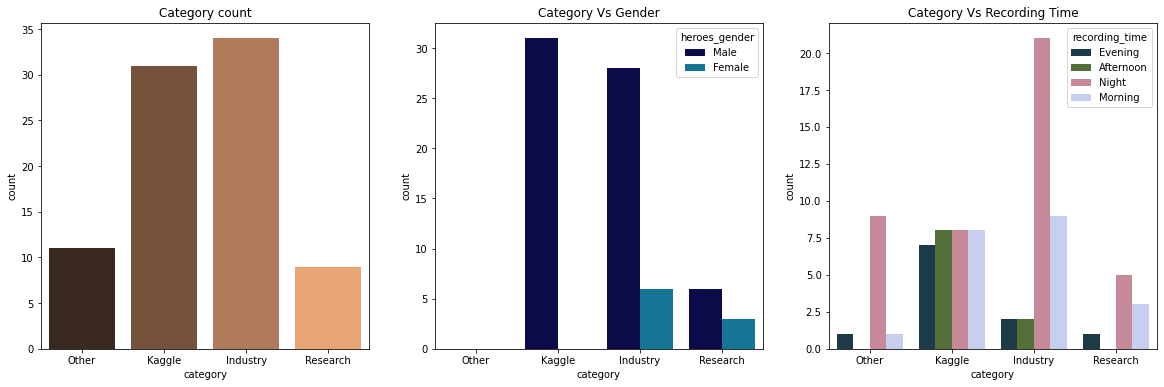

In [14]:
fig, ax = plt.subplots(1,3, figsize = (20,6), sharex=True)
sns.countplot(x='category',data=df_episodes, palette="copper", ax=ax[0])
sns.countplot(x='category',hue='heroes_gender', palette="ocean", data=df_episodes,ax=ax[1])
sns.countplot(x='category',hue='recording_time', palette="cubehelix", data=df_episodes,ax=ax[2])
ax[0].title.set_text('Category count')
ax[1].title.set_text('Category Vs Gender')
ax[2].title.set_text('Category Vs Recording Time')
plt.show()

* Heroes from the "industry" tops (40%) the podcasts closely followed by "Kaggle" (36%) and comparitively lesser researchers (10.5%). 
* Male dominance is pertinent here as well with Kagglers - completely being Male heroes. Within Industry its 18% to 82% Female to Male ratio. 
* <b><u>Better and best - Research field has 33.3% female to 66.67% Male.</u></b><br>
* Heroes from Industry seem to be convenient with night time recording probably because of geography.

# 4.3.3 Heroes Vs Youtube, Apple and Spotify

In [15]:
df_tmp = df_episodes.sort_values(by='heroes')
fig = px.bar(df_tmp, x='heroes', y='youtube_views', color='youtube_views',color_continuous_scale=["red", "green", "blue", "yellow"],
              title = '<b>Heroes Vs Youtube Views</b>', height=500)
mean_v = df_episodes['youtube_views'].mean()
fig.add_shape(type="line", x0='Abhishek Thakur', y0=mean_v, x1='Zachary Mueller', y1=mean_v, name='avg',line=dict(color='white', width=3, dash='dot'),)
fig.update_layout(height=700, plot_bgcolor='rgb(220,220,220)')
fig.update_xaxes(showgrid=False, zeroline=False, title = 'Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title = 'Youtube views')
fig.show()

<h3>* Jeremy Howard's episode had the most views in youtube -> 4502, followed by Parul Pandey with 2161 views and Abhishek Thakur with 1528 views<br>
* As we witnessed in section 4.1 above, those top 3 viewed videos helped significantly to CTDS youtube subscription base as well </h3>

In [16]:
df_tmp = df_episodes.sort_values(by='youtube_views',ascending=False)


fig = go.Figure(data=[
    go.Bar(name='Spotify listeners', x=df_tmp.heroes, y=df_tmp.spotify_listeners, marker_color='rgb(0, 102, 57)'),
    go.Bar(name='apple listeners', x=df_tmp.heroes, y=df_tmp.apple_listeners, marker_color='rgb(255, 128, 0)')
])
fig.update_layout(barmode='stack', height=700, title='<b>heroes vs spotify-apple listeners</b>', legend=dict(x=-.1, y=1.5),plot_bgcolor='rgb(220,220,220)' )
fig.update_xaxes(showgrid=False, zeroline=False, title = 'Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title='# of Listeners')
fig.show()

<h3>
* Relatively speaking, Spotify/Apple didn't garner enough attention with viewers like youtube, but they had good audience especially Apple podcasts based on the available data<br>
* Couldn't gather spotify avg listening duration, so couldn't relate the facts, but audio format seems to have worked well with audience listened to them. <u>Apple listen duration is 29.33 minutes when compared to youtube, which is mere 5.3 minutes - 5x more listening time</u>
* Spotify unique listeners are more (5455) when compared with apple that had 1714 unique listeners <br>
* Abhishek Thakur's episode had more listeners (456) from Spotify followed by a surprise Andrey Lukyanenko (251) and Ryan Chesler(214) - related episodes didn't make it to top 5 list in youtube medium <br>
* Apple listener segment - Jeremy howard's episode top's the list with 96 unique listeners
</h3>

In [17]:
print('\033[33m' + 'Average Stats grouped by heroes ' + '\033[0m')
df_tmp = df_episodes[['episode_duration','heroes','youtube_views','spotify_streams','spotify_listeners','apple_listeners']].sort_values(by='episode_duration', ascending=True)
df_tmp.fillna('host').groupby(['heroes']).mean().sort_values(by='episode_duration', ascending=True).head()

Average Stats grouped by heroes 


,episode_duration,youtube_views
heroes,,
host,711.818182,145.454545
Shivam Bansal,1912.000000,208.000000
James Dellinger,1949.000000,129.000000
Dmitry Danevskiy,2019.000000,347.000000
Sylvain Gugger,2043.000000,697.000000


In [18]:
print("Total videos that had more than avg youtube views:", len(df_episodes[df_episodes['youtube_views'] > 513]))

Total videos that had more than avg youtube views: 29


* Out of 85 videos, 29 videos had above the "average" youtube views of 513

<h3>Did shorter duration/host-Hero episodes had positive impact on viewership?</h3>

* Host-Hero Episodes aka shorter duration episodes didn't have positive impact (increase) on viewership nor subscribers. Another fact is that those shorter podcasts aren't interviews with ML heroes. In order to really compare duration and its impact, we might need some shorter duration interviews to analyse. Just duration didn't have a positive impact on viewership or subscribers. 

# 4.3.4 Twitter Followers of Heroes and its impact

In [19]:
path = '../input/ctdsshow-addn-data/'
df_ctds = pd.read_csv(f'{path}CTDS_Addn_Data.csv')
df_ctds_addn = pd.merge(df_ctds,df_episodes, how='left',on='episode_id')

In [20]:
fig = go.Figure(data=[
    go.Scatter(name='Heroes Twitter Followers', x=df_ctds_addn.episode_id, y=df_ctds_addn.heroes_twitter_followers, text=df_ctds_addn.heroes_x, mode='markers+lines',marker_color='rgb(0, 102, 57)'),
    go.Scatter(name='Youtube Views', x=df_ctds_addn.episode_id, y=df_ctds_addn.youtube_views, text=df_ctds_addn.heroes_x, mode='markers+lines',marker_color='rgb(255, 128, 0)'),
])
fig.update_layout(legend=dict(x=-.1, y=1.5),height=600, plot_bgcolor='rgb(255,250,250)' )
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

* Overall twitter followers of heroes didn't have much impact on CTDS.show youtube views, some of the episodes did better and followers stats could have complimented the same - E1 (Abhishek Thakur), E27 (Jeremy Howard), E49 (Parul Pandey), E48 (Christof Henkel), E60(Ines Montani). 
* Some episode views wasn't complimented by facts with heroes having great twitter followings didn't compliment podcast views - E19 (Chip Huyen), E35 (Rohan Rao), E37(Anthony Goldbloom), E42 (Sebastian Rashka), E72(Andreas Mueller), E75 (Rachel Thomas)

* There could be multiple factors as we don't have a time series data to follow along other trend to draw parallels. 

# **4.4 Youtube specifics**

<H3><u>Youtube Impressions & Non-Impressions</u></H3>

In [21]:
fig = go.Figure(data=[
    go.Scatter(name='yt impression_views', x=df_episodes.heroes, y=df_episodes.youtube_impression_views, mode='markers+lines', marker_color='mediumaquamarine'),
    go.Scatter(name='yt non impression_views', x=df_episodes.heroes, y=df_episodes.youtube_nonimpression_views, mode='markers+lines', marker_color='peru')
])
fig.update_layout(legend=dict(x=-.1, y=1.5), height=600, plot_bgcolor='rgb(255,255,255)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_yaxes(title='# of views')
fig.show()

In [22]:
print("Total Youtube Impression views:", df_episodes.youtube_impression_views.sum())
print("Total Youtube Non Impression views:", df_episodes.youtube_nonimpression_views.sum())

Total Youtube Impression views: 15462
Total Youtube Non Impression views: 28154


<h3>* Non impression views from youtube are more than impression views that indicates CTDS brand - Sanyam's network has driven viewership more than (almost twice) youtube's internal recommendations<br>
* There are few episodes like Abhishek Thakur, Julian Chaumond, Chip Huyen - where youtube impressions overtook external sources, probably they are so popular and their network could have also contributed to the views..</h3>

**<H3><u>Impact of youtube thumbnails on viewership</u></H3>**

In [23]:
df = df_episodes.groupby('youtube_thumbnail_type').agg({'youtube_views':'sum', 'episode_id':'count','youtube_impression_views': 'sum','youtube_nonimpression_views': 'sum'}).reset_index()
fig = make_subplots(rows=1, cols=4, x_title='Thumbnail Type', column_titles=("Episodes count","youtube - views", "impression views" , "nonimpression views"))

colors = ['lightgrey'] * 4
colors[0] = 'teal'
colors[1] = 'skyblue'
colors[2] = 'burlywood'
colors[3] = 'coral'

fig.append_trace(go.Bar(name='# of episodes', x=df.youtube_thumbnail_type, y=df.episode_id, showlegend=False, marker_color=colors), row=1, col=1),
fig.append_trace(go.Bar(name='youtube views', x=df.youtube_thumbnail_type, y=df.youtube_views, showlegend=False, marker_color=colors), row=1, col=2),
fig.append_trace(go.Bar(name='youtube impression views', x=df.youtube_thumbnail_type, y=df.youtube_impression_views, showlegend=False, marker_color=colors), row=1, col=3),
fig.append_trace(go.Bar(name='youtube nonimpression views', x=df.youtube_thumbnail_type, y=df.youtube_nonimpression_views, showlegend=False, marker_color=colors), row=1, col=4),

fig.update_layout(barmode='stack', font=dict(size=10), legend_orientation="h", height=400, plot_bgcolor='rgb(255,255,255)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

# Did youtube thumbnails change any audience behavior?
> *0 - default, 1 - default+custom annotation, 2-custom image+annotation, 3-customer image+ctds branding+Title/tags*
* Looking at the graph in comparison with episodes, looks like cosmetic professional change of thumbnail didn't have positive impact on episode viewership nor it didn't draw much of youtube impressions as well. Infact episodes with complete CTDS branding of thumbnail had lesser views per episode relatively as we go from default thumbnail.

# Whats the youtube views trend after the contest announcement?

In [24]:
fig = go.Figure(data=[
    go.Scatter(name='Youtube Views - Jun20', x=df_ctds_addn.episode_id, y=df_ctds_addn.youtube_views_Jun20, text=df_ctds_addn.heroes_x, marker_color='rgb(255, 128, 0)'),
    go.Scatter(name='Youtube Views - Jul13', x=df_ctds_addn.episode_id, y=df_ctds_addn.youtube_views_Jul13,text=df_ctds_addn.heroes_x, marker_color='rgb(102, 178, 255)')
])
fig.update_layout(legend=dict(x=-.1, y=1.5),height=600, plot_bgcolor='rgb(255,255,250)' )
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title='Youtube Views')
fig.show()

In [25]:
yt_jun20 = df_ctds_addn['youtube_views_Jun20'].sum()
yt_jul13 = df_ctds_addn['youtube_views_Jul13'].sum()
print(f'Youtube views until Jun 20: {yt_jun20} and youtube views until Jul13: {yt_jul13}')
print(f'percentage increase of youtube views since contest started: {round(((yt_jul13-yt_jun20)/yt_jun20)*100,2)}%')

Youtube views until Jun 20: 43616 and youtube views until Jul13: 46623
percentage increase of youtube views since contest started: 6.89%


As we could see, there is marginal increase in youtube views across the episodes since the contest started. <br>
Overall there had been ~7% (3000+views) increase in overall views. We need more viewers to listen and learn from the podcast through the experience of ML heroes across the world. It happens and will continue to happen..

# 4.5 Flavour of Tea and its effects

In [26]:
fig = px.scatter(df_episodes, x = df_episodes.episode_id, y=df_episodes.flavour_of_tea, title='<b>Flavors of Tea across Episodes</b>', color=df_episodes.flavour_of_tea)
fig.update_layout(plot_bgcolor='rgb(0,0,0)', xaxis={'categoryorder':'category ascending'}, showlegend=False)
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title='Flavour of Tea')
fig.data[0].update(marker_symbol='circle', marker_size=8)
fig.data[1].update(marker_symbol='diamond', marker_size=8)
fig.data[2].update(marker_symbol='pentagon', marker_size=7)
fig.data[3].update(marker_symbol='hexagon', marker_size=7)
fig.data[4].update(marker_symbol='octagon', marker_size=7)
fig.data[5].update(marker_symbol='star', marker_size=7)
fig.data[6].update(marker_symbol='cross', marker_size=7)
fig.data[7].update(marker_symbol='cross-dot', marker_size=7)
fig.data[8].update(marker_symbol='triangle-down', marker_size=7)
fig.show()

In [27]:
data = [dict(type = 'bar',x = df_episodes.flavour_of_tea, y = df_episodes.youtube_views, mode = 'markers',marker = dict(color = 'coral'),
             transforms = [dict(type = 'aggregate',groups = df_episodes.flavour_of_tea,
                                aggregations = [dict(target = 'y', func = 'avg', enabled = True),])])]

layout = dict(title = '<b>Tea Flavour vs Mean Youtube views<b>',xaxis = dict(title = 'Tea Flavour'),yaxis = dict(title = 'Mean Youtube views'))

fig_dict = dict(data=data,layout=layout)

pio.show(fig_dict, validate=False)

* Above visualization represents chai consumed by the host before the episodes against average youtube views/episode. <br>
* Did it had any effect on the content/audience? Lets find..
* <u>Episodes where sulemani chai variety was consumed got more avg views per episode with ~1k followed by Ginger Chai with 720 views/episode. Lets explore other parallels that had effect on the viewership or energy level of host across episodes..</u>

<H3>Did consumption of tea and recording time had any effect on youtube views? </H3>

In [28]:
dff = df_episodes.groupby(['recording_time', 'flavour_of_tea'])['youtube_views'].mean().reset_index()
fig = go.Figure(data=go.Heatmap(x = dff.flavour_of_tea, y=dff.recording_time,z=dff.youtube_views, colorbar = dict(title='youtube_views'), 
                                hovertemplate='flavour_of_tea: %{x}<br>recording_time: %{y}<br>youtube_views: %{z:.0f}<extra></extra>', 
                                hoverongaps=False, colorscale='Viridis'))
fig.update_xaxes(showgrid=False, zeroline=False, title='<b>Flavour of tea</b>')
fig.update_yaxes(showgrid=False, zeroline=False, title='<b>Recording Time</b>')
fig.show()

* Just curious to know whether recording time along with tea flavour consumed by host gave a boost to the show with good energy levels that set right tone during the show?
* Following inference could also be a factor towards better show - Sulemani chai in the morning & night and Ginger chai during the evening had better positive effect on the show - youtube views are the supporting facts:)

# **5 Content Related**
# 5.1 Questions

In [29]:
sub_path = '../input/chai-time-data-science/Cleaned Subtitles/'

In [30]:
def questions(df):
    df_qt = df[df['Text'].str.contains("\?") & df['Speaker'].str.contains("Sanyam Bhutani")]
    df_ttemp = df_qt['Text'].copy()
    return df_ttemp

In [31]:
nlp = spacy.load('en', entity=False)

In [32]:
def word_count(df,e):
    df['tokens'] = df['Text'].apply(lambda x: nlp(x))
    df['Word_count'] = [len(token) for token in df.tokens]
    df_t = df.groupby(['Speaker'])['Word_count'].sum().reset_index()
    df_t['Episode'] = e
    return df_t

In [33]:
def q_count(df):
    df_qt = df[df['Text'].str.contains("\?") & df['Speaker'].str.contains("Sanyam Bhutani")]
    length = len(df_qt)
    return length

In [34]:
def c_count(df,e):
    df_ct = df.groupby('Speaker').agg({'char_count':'sum'}).reset_index()
    df_ct['episode_id'] = e
#     length = len(df_qt)
    return df_ct

In [35]:
!pip install natsort

In [36]:
ss_list = []
for f_name in os.listdir(f'{sub_path}'):
    ss_list.append(f_name)

In [37]:
from natsort import natsorted
s_list = natsorted(ss_list)

In [38]:
df_qct = pd.DataFrame(columns=['episode', 'q_count'])
for i in range(len(s_list)):
    Episodes = pd.read_csv(f'{sub_path}'+s_list[i])
    ep_id = s_list[i].split('.')[0]
    get_df = q_count(Episodes)
    df_qct = df_qct.append({'episode': ep_id,'q_count': get_df}, ignore_index=True)

In [39]:
df_lct = pd.DataFrame(columns=['episode_id', 'Speaker','char_count'])
for i in range(len(s_list)):
    Episodes = pd.read_csv(f'{sub_path}'+s_list[i])
    ep_id = s_list[i].split('.')[0]
    Episodes['char_count'] = Episodes['Text'].apply(len)
    get_df = c_count(Episodes,ep_id)
    df_lct = df_lct.append(get_df, ignore_index=True)

In [40]:
# Getting questions
df_qs = pd.DataFrame(columns=['episode', 'questions'])
for i in range(len(s_list)):
    Episodes1 = pd.read_csv(f'{sub_path}'+s_list[i])
    ep_id = s_list[i].split('.')[0]
    get_df1 = questions(Episodes1)
    df_qs = df_qs.append({'episode': ep_id,'questions': get_df1}, ignore_index=True)

In [41]:
df_lct['speaker_g'] = df_lct['Speaker'].map({'Sanyam Bhutani': 'Host'})
df_lct["speaker_g"].fillna("Heroes", inplace = True)

In [42]:
fig = go.Figure(data = go.Scatter(x=df_qct.episode, y=df_qct.q_count, mode='markers+lines'))
fig.update_layout(title = '<b>Episodes Vs # of Questions</b>', height=600, width=900, xaxis_title="Episodes", yaxis_title="# of questions",legend_orientation="h", plot_bgcolor='rgb(255,255,255)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

# Questions being asked by the host and related inference
* Trend in questions being asked by host is almost at the constant mean level of 20/episode, while there is slight dip after E53. Probably based on the comments, suggestions and the learning over time would have brought standardization and maturity in asking just right questions. <br>
* E69 being the birthday episode related to AMA - question count wass at the peak as expected <br>
* There were very few episodes with considerable dip in questions.
    * E74 - there weren't any questions from the host. Verified subtitles as well - there seem to be missing data. Verified by watching related podcasts - data was infact missing in supplied dataset. Will try to extract the data here for further analysis later...
    * E25 and E15 - question count is low. Need to verify whether missing data is genuinely missed. <br>

In [43]:
pd.set_option('max_colwidth', None)

In [44]:
df_qs['questions'] = df_qs['questions'].map(str)
df_qs['AMA'] = df_qs['questions'].str.contains(" AMA ")

# Introduction of AMA section in podcasts and its effect

In [45]:
df_qs['episode_id'] = df_qs['episode']
df_ama = pd.merge(df_episodes,df_qs, how='left',on='episode_id')
df_ama['AMA'].fillna(False, inplace=True)

In [46]:
fig = px.scatter(df_ama, x="episode_id", y="youtube_views",size="youtube_views", color="AMA", size_max=40)
fig.update_layout(legend_orientation="h", plot_bgcolor='rgb(240,240,240)')
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title='Youtube views')
fig.update_layout(title_text="<b>AMA Presence in Episodes & Youtube Views<b>")
fig.show()

* AMAs (questions collected from viewers) were introduced from E20, looks like it had positive impact on the youtube views and subscribers. <br>
* <b>Average youtube views for episodes with AMA was very good 1223, whereas overall mean for podcast series was 513. Episodes with AMA impact was more than double the overall mean youtube views. </b><br>
* Average subscribers for episodes with AMA stood at 32 whereas overall average across the episodes was just 12. Here again stats show that episodes with AMA did well. Probably listeners were interested with mix of questions coming in from more people. Sanyam pls keep including AMA..

# 5.2 Episode Introduction Duration and its effect

In [47]:
#Duration calculation
df_dur = pd.DataFrame(columns=['episode', 'intro_duration'])
for i in range(len(s_list)):
    Episodes = pd.read_csv(f'{sub_path}'+s_list[i])
    Episodes['Duration_Sec'] = Episodes['Time'].str.split(':').apply(lambda t: int(t[0]) * 60 + int(t[1]))
    ep_id = s_list[i].split('.')[0]
    intro_time = Episodes['Duration_Sec'][1]
#     get_df = q_count(Episodes)
    df_dur = df_dur.append({'episode': ep_id,'intro_duration': intro_time}, ignore_index=True)

In [48]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("<b>Episode Intro Duration (sec)</b>", "<b>Youtube Views</b>"))

fig.append_trace(go.Scatter(name='<b>Episode Intro Duration </b>', x=df_dur.episode, y=df_dur.intro_duration, marker_color='rgb(0, 102, 57)'), row=1, col=1),
fig.append_trace(go.Scatter(name='<b>Youtube Views</b>', x=df_episodes.episode_id, y=df_episodes.youtube_views, marker_color='rgb(0, 76, 153)'), row=2, col=1),

fig.update_layout(height=800, width=900, legend_orientation="h", plot_bgcolor='rgb(255,255,255)')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

* Introduction duration was on a rise in the beginning until E35, later duration got a dip hovering around 150ish seconds. Probably based on the comments, suggestions and the learning over time, introduction was made crisp.
* How did it correlate with youtube views?
    * Looks like it didn't have any significant impact or marginally better with views after E23 (over the time subscribers improved as well), in pulling in the audience as after Episode 60 - complete branding and thumbnails have been revamped neither it had positive impact.
    * Introduction is the key for audience to begin listening to the podcast or viewing youtube videos as they set the stage on what is on the table to stay tuned.

# 5.3 Host conversation length

In [49]:
yy = df_lct[df_lct['speaker_g'].str.contains("Host")]
fig = px.bar(yy, x = yy.episode_id, y=yy.char_count, title='<b>Episodes Vs Conversation Text length of Host</b>')
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title= 'Host - Text Length')
fig.update_layout(plot_bgcolor='rgb(250,250,250)')
fig.show()

# 5.4 Tea Flavour Vs Conversation text length of host across episodes

In [50]:
tea = pd.merge(df_episodes,yy, how='inner',on='episode_id')
tea['char_count'] = tea['char_count'].astype(str).astype(int)
tt = tea.groupby("flavour_of_tea").agg({"char_count": [np.mean, np.sum]})
tt.columns = ['_'.join(col) for col in tt.columns.values]
display(tt)

,char_count_mean,char_count_sum
flavour_of_tea,,
Apple Cinnamon,11586.250000,46345
Ginger Chai,11112.750000,177804
Herbal Tea,11827.000000,130097
Kashmiri Kahwa,11530.250000,46121
Kesar Rose Chai,26615.500000,53231
Masala Chai,12086.000000,181290
Paan Rose Green Tea,9833.166667,58999
Sulemani Chai,9340.090909,102741
Tulsi Chai,11876.800000,59384


* Host's energy level or interaction was more in Episodes E69 (Masala Chai), E63 (Paan Rose Green Tea), E48 (Ginger Chai), E44 (Herbal Tea), E35 (Ginger Chai) <br>
* After grouping total character count of host by Tea flavours, as found in the table above<br>
    * Masala Chai tops the list with ~181k characters uttered by the host Closely followed by Ginger Chai with ~178k
* Going by the mean character count of host by Tea flavours,  kesar rose chai seem to be giving highest boost to the host, followed by Masala chai, which is distant second. # of heroes episodes with Kesar Rose chai is just 2. Unless we have more episodes with kesar rose chai, we can't get to a conclusion of its effect on the show.
* Host to consume more of Masala chai (could be his favorites) to be more energetic, interactive and bring more liveliness to the podcasts if necessary based on the situation as not all episodes need too much of talking by the host:)

# 5.5 Word Count of speakers across Episodes
    * Most and Least viewed Episodes *

In [51]:
# Most Viewed Episodes
top_ed = ['E27.csv', 'E49.csv', 'E1.csv', 'E33.csv', 'E38.csv', 'E26.csv', 'E60.csv', 'E35.csv', 'E34.csv', 'E25.csv']

df_wordct_t = pd.DataFrame()
for i in range(len(top_ed)):
    ep_id = top_ed[i].split('.')[0]
    Episodes = pd.read_csv(f'{sub_path}'+top_ed[i])
    content = word_count(Episodes,ep_id)
    df_wordct_t = df_wordct_t.append(content, ignore_index=True)

In [52]:
# Least Viewed Episodes
least_ed = ['E14.csv', 'E20.csv', 'E7.csv', 'E3.csv', 'E16.csv', 'E10.csv', 'E12.csv', 'E2.csv', 'E8.csv']

df_wordct_l = pd.DataFrame()
for i in range(len(least_ed)):
    ep_id = least_ed[i].split('.')[0]
    Episodes = pd.read_csv(f'{sub_path}'+least_ed[i])
    content = word_count(Episodes,ep_id)
    df_wordct_l = df_wordct_l.append(content, ignore_index=True)

In [53]:
fig = px.bar(df_wordct_t, x='Episode', y='Word_count', color='Speaker', color_discrete_sequence=px.colors.qualitative.Prism,
              title = '<b>Top Viewed Episodes - word count host Vs heros</b>', height=500, width=800)
fig.update_xaxes(showgrid=False, zeroline=False, title='Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title = 'Host - word count')
fig.update_layout(plot_bgcolor='rgb(0,0,0)')
fig.show()

<h3>In regards to Top viewed episodes, Heroes express more and being engaged well than the host, which possibly shows heroes are opening up gladly and expressing their thoughts, questions are good and other factors. Ratio of word count between host-hero here is 1 : 4.12</h3>

In [54]:
fig = px.bar(df_wordct_l, x='Episode', y='Word_count', color='Speaker',color_discrete_sequence=px.colors.qualitative.Prism,
              title = '<b>Least Viewed Episodes - word count host Vs heros</b>', height=500, width=800)
fig.update_xaxes(showgrid=False, zeroline=False, title = 'Episodes')
fig.update_yaxes(showgrid=False, zeroline=False, title = 'Host - word count')
fig.update_layout(plot_bgcolor='rgb(0,0,0)')
fig.show()

<h3>In regard to least viewed episodes, Host Vs hero ratio of words being spoken is much lesser when compared with top viewed videos. <br>
    Ratio of word count between host-hero here is just 1 : 2.75</h3>

# Insights from subtitles/content of the podcasts
* <h3>What we infer from Top viewed videos?</h3>

    * Ratio between word count of Sanyam(host) : Heros is 4.12. This stats show a good interaction between host and heros as heroes were uttering 4x words than the host that represents that heroes were opening up and were engaging more in the podcast. *excluded an outlier - E49 where Sanyam was talking more than the host - ratio was -1.6.<br>
    * <u>Top viewed video between Jeremy and Sanyam - this word utterance ratio was whopping 5.8</u>. This was the best ratio in the stack and definitely more engaging one with more vocal contribution from the hero of the episode.<br>
    
* <h3>What we infer from Least viewed videos?</h3>

    * Ratio between word count of Sanyam(host) : Hero is just 2.75. This stats that heros weren't engaged in the interview much might be due to multiple factors. Will explore more on this regard. <br>
    * Word count average of the host Sanyam with least viewed video (2115 words) is almost the same as with most viewed content (2211 words)

# Concluding Statements

* Appreciation goes to CTDS for hosting such informative, unique podcast series with top ML/Data science researchers across the world
* Though not exponential, Youtube views and subscriptions are marginally increasing over time.
* Cumulatively, youtube subscribers count hits new peak after most viewed episodes. In CTDS we observed 3 significant peaks, one after Jeremy Howard's episode, one after Parul Pandey's episode and the other Abishek Thakur's episode, which were 3 most viewed episodes in CTDS show. Host should concentrate on producing such videos that appeals to mass crowd as podcasts like CTDS.show deserve much much bigger audience for its content.
    * Episodes being released after highly viewed episodes to be concentrated more by Sanyam to attract more audience and sustain organic growth.
* Introduction of AMA in podcasts seem tohave worked positively.
    * Average youtube views for episodes with AMA was very good 1223, whereas overall mean for podcast series was 513.
* Most viewed videos had better engagement with heroes as ratio of average word count between host and hero is 4.12 whereas with lowest viewed videos it dropped to just 2.75. Audience seem to love hearing more from the heroes.
* Youtube non-impression views are more than impressions (almost 2x), looks like CTDS has got good network and reputation in a circle that has driven non-impression views. To reach masses or bigger crowd, organic growth is important.
* Sulemani, Masala and Ginger flavour chai seem to be positively impacting host's interaction with the heroes in the podcasts.
* Podcasts looks to be better presented as audio episodes than audio/video (youtube), which is evident from apple/spotify stats vs youtube stats. Former had solid viewership with reference to watch duration though viewership count was less.
* Better suited podcast mediums - spotify and apple - either marketing/word of mouth will help in getting the audience. Once we get audience they seem to be listening to the episodes more than through youtube.
* Overall the contribution of CTDS is immense to Machine Learning/Data Science community. Sanyam's release of podcasts is consistent over the year, which shows his dedication. The fact that well respected heroes are willing to give interview to CTDS channel express the reputation Sanyam has in the AI community.


# Naming few ingredients that seems to be working well

* Including AMA section in all the episodes as possible <br>
* Concentrating more on episodes that immediately follow most viewed podcasts <br>
* Requesting more female heroes to be part of the podcasts as they garnered more youtube views than male heroes <br>
* Giving more space and time to heroes as needed - top viewed episodes suffice this fact <br>
* Drinking Sulemani chai in the morning & night recording session and Ginger Chai in the evening recording sessions seem to have positive effect on podcasts <br>

All the above are just my humble opinion based on the data and inference. I totally value all the hard work put into running these podcasts. Kudos.
Hopefully this contest will drive the audience to these podcasts exponentially. It already started!!